In [63]:
import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Conv2D, Activation, BatchNormalization, MaxPooling2D, Dropout, Flatten

from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers import Rescaling

In [64]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [65]:
train_dir = "Fish-Species-Identification-CNN/Project4/data/train_test_split/train" #"Resources/data/train"
test_dir = "Fish-Species-Identification-CNN/Project4/data/train_test_split/test" #"Resources/data/test"
val_dir = "Fish-Species-Identification-CNN/Project4/data/train_test_split/val" #"Resources/data/val"

In [66]:
train = image_dataset_from_directory(
    train_dir, 
    labels = 'inferred', 
    label_mode = 'categorical', 
    class_names=['Black Crappie', 'Cobia', 'Flounder', 'King_Mackeral', 'Largemouth_Bass', 
                 'Red', 'Smallmouth_Bass', 'Snook', 'Tarpon', 'Tripletail', 'Trout'], 
    batch_size = 32, 
    image_size = (256, 256), 
    shuffle=True, 
    validation_split = 0, 
    crop_to_aspect_ratio = True
)

Found 1969 files belonging to 11 classes.


In [67]:
test = image_dataset_from_directory(
    test_dir, 
    labels = 'inferred', 
    label_mode = 'categorical', 
    class_names=['Black Crappie', 'Cobia', 'Flounder', 'King_Mackeral', 'Largemouth_Bass', 
                 'Red', 'Smallmouth_Bass', 'Snook', 'Tarpon', 'Tripletail', 'Trout'], 
    batch_size = 32, 
    image_size = (256, 256), 
    shuffle=True, 
    validation_split = 0, 
    crop_to_aspect_ratio = True
)

Found 294 files belonging to 11 classes.


In [68]:
validation = image_dataset_from_directory(
    val_dir, 
    labels = 'inferred', 
    label_mode = 'categorical', 
    class_names=['Black Crappie', 'Cobia', 'Flounder', 'King_Mackeral', 'Largemouth_Bass', 
                 'Red', 'Smallmouth_Bass', 'Snook', 'Tarpon', 'Tripletail', 'Trout'], 
    batch_size = 32, 
    image_size = (256, 256), 
    shuffle=True, 
    validation_split = 0, 
    crop_to_aspect_ratio = True
)

Found 562 files belonging to 11 classes.


In [69]:
print('\nTraining Dataset:', train)
print('\nTesting Dataset:', test)
print('\nValidation Dataset:', validation)


Training Dataset: <BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 11), dtype=tf.float32, name=None))>

Testing Dataset: <BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 11), dtype=tf.float32, name=None))>

Validation Dataset: <BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 11), dtype=tf.float32, name=None))>


In [70]:
scaler = Rescaling(1./255)

train = train.map(lambda x, y: (scaler(x), y)) 
test = test.map(lambda x, y: (scaler(x), y))
validation = validation.map(lambda x, y: (scaler(x), y))

In [71]:
augmentation = tf.keras.Sequential(
    [
        tf.keras.layers.RandomRotation(
            factor = (-.25, .3),
            fill_mode = 'reflect',
            interpolation = 'bilinear',
            seed = 42),

        tf.keras.layers.RandomBrightness(
            factor = (-.45, .45),
            value_range = (0.0, 1.0),
            seed = 42),

        tf.keras.layers.RandomFlip(
            mode = "horizontal_and_vertical",
            seed = 42
        )
    ]
)

In [72]:
model = Sequential()

#model.add(augmentation)

model.add(Conv2D(32, 
                 (3,3),
                 strides=1,
                 padding='same', 
                 input_shape=(256, 256, 3), 
                 ))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(64, (5,5), padding = 'same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), padding = 'same'))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(11, activation='softmax'))

In [73]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [74]:
red_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.1, 
    patience=10, verbose=1 ,mode="auto", min_delta=0.0001, cooldown=0, min_lr=0)

model.fit(train, epochs=75, validation_data=validation, shuffle=True, batch_size=32, verbose=2, callbacks=[red_lr])

Epoch 1/75
62/62 - 9s - loss: 14.5478 - accuracy: 0.1392 - val_loss: 2.4119 - val_accuracy: 0.1548 - lr: 0.0100 - 9s/epoch - 152ms/step
Epoch 2/75
62/62 - 9s - loss: 2.3779 - accuracy: 0.1981 - val_loss: 3.1143 - val_accuracy: 0.1708 - lr: 0.0100 - 9s/epoch - 146ms/step
Epoch 3/75
62/62 - 9s - loss: 2.2554 - accuracy: 0.2250 - val_loss: 3.5496 - val_accuracy: 0.2260 - lr: 0.0100 - 9s/epoch - 144ms/step
Epoch 4/75
62/62 - 9s - loss: 2.2220 - accuracy: 0.2453 - val_loss: 3.2280 - val_accuracy: 0.2722 - lr: 0.0100 - 9s/epoch - 143ms/step
Epoch 5/75
62/62 - 9s - loss: 2.1213 - accuracy: 0.2798 - val_loss: 2.8150 - val_accuracy: 0.2598 - lr: 0.0100 - 9s/epoch - 143ms/step
Epoch 6/75
62/62 - 9s - loss: 2.0381 - accuracy: 0.3154 - val_loss: 3.0355 - val_accuracy: 0.2811 - lr: 0.0100 - 9s/epoch - 143ms/step
Epoch 7/75
62/62 - 9s - loss: 1.9773 - accuracy: 0.3245 - val_loss: 2.0927 - val_accuracy: 0.2883 - lr: 0.0100 - 9s/epoch - 144ms/step
Epoch 8/75
62/62 - 9s - loss: 1.9174 - accuracy: 0.346

In [75]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 256, 256, 32)      896       
                                                                 
 activation_16 (Activation)  (None, 256, 256, 32)      0         
                                                                 
 batch_normalization_11 (Bat  (None, 256, 256, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 128, 128, 32)     0         
 g2D)                                                            
                                                                 
 dropout_16 (Dropout)        (None, 128, 128, 32)      0         
                                                                 
 conv2d_12 (Conv2D)          (None, 128, 128, 64)    

In [76]:
predictions = model.predict(test)
val_loss, val_acc = model.evaluate(test)

print('\nValidation Loss: ', val_loss)
print('\nValidation Accuracy: ', np.round(val_acc * 100), '%')

# model 1 batch size 16 : epochs 100 : plat 0.1 factor patience 5 : sgd optimizer 1.95 val loss, accuracy 48%
# model 2 batch size 32 : epochs 75 : plat 0.1 factor patience 10 : sgd optimizer 1.93 val loss, accuracy 58%

10/10 [==============================] - 1s 24ms/step - loss: 1.9318 - accuracy: 0.5816

Validation Loss:  1.9318175315856934

Validation Accuracy:  58.0 %


1/1 [==============================] - 0s 183ms/step

Predicted Class: Flounder

Confidence Score: 1.0


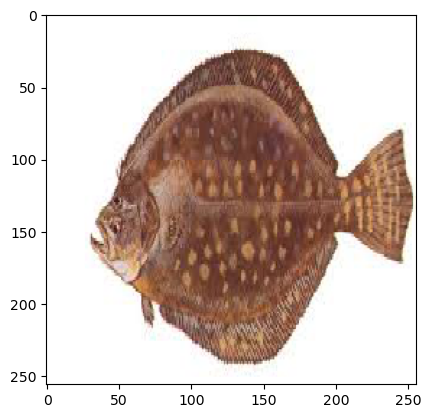

In [77]:
from urllib.request import urlopen
from io import BytesIO
from tensorflow.keras.preprocessing import image

image_path = "data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxITERUTExMWFhIXGBsaGRgWGRYYGhoaGxgaGBcZGhgaHyggGBolGxcVITEiJSkrLi4uGx8zODMtNygtLisBCgoKDg0OGhAQGy0lHyYtLS0tLS8tLS0tLy0tLS0tLS0tLS0tLS01LS0tKy0tLS0tLS0tLS0tLS0tLS0tLS0tLf/AABEIAKMBNAMBIgACEQEDEQH/xAAcAAEAAgMBAQEAAAAAAAAAAAAAAwQCBQYHAQj/xAA5EAABAwIEAwYFAgUFAQEAAAABAAIRAyEEEjFBBVFhBiJxgZHwEzJCobEHwRRS0eHxI2JygpKiM//EABkBAQADAQEAAAAAAAAAAAAAAAABAgMEBf/EACYRAQEAAgICAQMEAwAAAAAAAAABAhEDIRIxUQRBYRQiQnEykbH/2gAMAwEAAhEDEQA/APcUREBERAREQEREBERAREQEREBERAREQERR1azWiXODRa5IAvYa9UEiKH+Lp/zt3+obGD6G3ivv8Qz+ZusajXl4qNw0lRfAV9UgiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICItfxjjNDDMz1nho+5uBYamMw0RMm+o2CocV4zQw7c1ao1ggkAm5Aico1dqNOa8241+ptarmZhKeUQe+67tBdo0B11XDY7E1a1QvxFQvfMnNoO8ZgCzRDSs7n8NceH5ep8V/VHCsH+i11U3mxaBDgAZOxEkeS5vGfqjjHEinSpsF4mXG7u7vqACPUrkaWIaxuWL9dJ2H/on0Kqk6gCetzfb7Ek+Kp5Vtjx4/Dc8R7YcQrnvYhzRe1PuDvGMvdudLSSqOLq1ajPiVK76jS6+ZzjoMua51gNAVR9J0HK030MGw0B8m/cqzw2kSSxzXBrtoMW0Bt5+NlWr60p0xGp9i5/bzVgMGXQyOp1Og8QJJUdfDupuPdMA2JFuknzLj6K3gOIMFN9Nzc0gkHQkm0HqdegVL+Fozp8SrsM069Vgto90wNN9JmAtvwvtjxNpIbVNSBpUAdBOvIk9NBdc7h8O54cWuEtvf6jpI5AaBZYTEmmQRqLWuSTfL46EnYQFPc9Hjjfcd9wj9VajSRi6ILZ+alYiw7uVxh195XpXCeJU8RSZWpGWOE7SDu0xo4aEL8+vwjn0zUkG5mPHRuwb1V3sv2mr4J0sJfSJ71Oe6dM2XWD/uV8eSxlycEveL9AotbwHjdHF0hUpOkTBBkFrhqCCtkt5d+nHZoREUgiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgKDGYtlJhfUcGMGpcYC0fa3tXTwbI+esZy0wb6TLuQ08dl5Rxvi2IxJLq9UkAEhgszpDd/mbGpuqZZ66a4cVy7rtO0P6kjvU8IwuOnxXRlHeAlrfq13i6884gHvcKtaoajnnMSToZYB0sPwrtLDgtAjK0GQ47wdhqQcrTPVfG1KVO0SYsTc6RbYW/Cwue66sePU6VOH4aq+YGVtvmmD8sxvs71Vmlwhg+d8mP+I0g+sfcqjiOM1CTFh733URqAszFxzcvfmottWmLdU2YZnJxO+p579V9/j6egsuYqYi0Ae+is4eDSLnEZybeCrpbUbo8QpiCT4gRKzp4+nPUb9PBcy7DgszCc0m3QbKR+UNaZ7+49U8IOmfi2jQg36X6hRfGpubJYCL6gErngXOs0xH9Fjh65kiYtrPuU8ekN67B0nXZLHc2n9t1QxfC6jZcIe0CBEiBuIJm+pOpSlineIPrpv6LbYPE2DnWSeX2S5+hXdBZc5tRpPQfytjUq3XxVN9NrWt7zbGBAIE77NlbfE4SnWBuJ/mG/R0fMJWjxHDHUpzfLz+kxuQPs3dNyp1pc4DxSthawrUZIb8wsA5kjM3TugwL9F7d2Z7QUsZSD2GHADOw6tJGnhrC8N4dinU5GWc2x18z7hTcF4vUwmJFdgAP1DQFp1tsDGutrK2OdxrHk45nN/d+hEVPhPEGYiiytT+R7ZExI5gxuDZXF1y7cIiIgIiICIiAiIgIiICIiAiIgIiICIsXvAEkgDmbIMlx3bPtk3Dg0qEPxFgdxTmbu62+W1jK1XbvthUbUOGwzsr2kZ37tiSR42afArkMJgiQXPcSXXLjJc7STJvHzCVllya6jow4vvUDqj3vc8k1KpPee46Q4AgE6WBssvhsYMzoc4RExA0HnoLq3jqzaTe7v46k3v78VzOMxRfc8/f4WGTqxjZ1cSXNLs3Lz9ha2viWFuX6wbk766fZWcHQcaeYR7soBwtzu8Bvqon7VvcfcJlvnG1vwsKgZLuUGLnlb7r68EGIM7ymJocnKJamxrgrlZ9OG5JFu8DzUmEotvm9+7KPEUO8S0d3T39vVX30r92BY6J+k+9F9bkLDNnagz9oU1Go7LlLSRt0VKu6TMR+6RF2zpE5XEKIWWdJ5AI5qKtOuyJZyQJhSDEOIAmw0CkdiQ6kGRcGx6clWw7DmA2/ZXkiN1s+H8Uyw2PNbahxRrrO0OvsrQYprQ4ZdCPRTNqtDIiXc1XObWjYhopvD2XH8uuh25+G5VbHYxr3FwGUHXn4n8T0VWniCLKzWpfEAOjtzzMb+v3WcnfadN/2N7WuwTsru9h3EZhfubZm/kjpzK9mwWLZVY2pTcHMcJBG4X5x+HlsRBHPTn6C/p1C6vsP2vOCd8KpJw7jpux25HSZkePK+2GenLzcW+49qRQ4TFMqsbUY7MxwkEbgqZdDkERc/wAZ7VUaRLGEVKotANgf9x59BdVyymM3VscbldRvyVoeK9rsNR+o1HcmQR/6NvuuI4rx+rVcG1asA/Q0W/8AImf+0rW4utlGgZOhfd3oNvPyXPlz7/xdOP08/k6HiXb+vE0qVNg51CTb1bB8l3fCMUatCnUIAL2hxA6heFAOdfIXnUF9h6f2XsvYvEZ8FRJiQ2Dl0kGCrceduXavNx44yabxERdDmEREBERAREQFxf6jcaNKi+mPmeAxo1zfEDu8OrHNBXZPcACTYDcrxr9Re0rcTVaKP/50gQ1+hcXWcWnUNi3W6pyXUbcOO8mlaWUs1zUfNybgHS/8x7rbTF99Fm7jNMWG+pJkkxz2Wlp1nQGyB78ef9VMKbZuJJ3P5XM7NLeJr533Et0Hvmsf4X4hAaPf9F8w1YU6g+J8h0MTGi7PCYdrgHB0tNxAER1KzuNtXucxmmgw3AyyC4zvlH58Fcfw5sy4zob6Tm/YZltakDS2/jpe/QaKpiqwy3j3ITLFGOW2oxGF/wC0SJ6H+i1D6jQ6CdPeq6B+ImRYdP285C14wjGVC512wIm+v9lXX3XmX2RcPDXuAmGiSo8bRAzAGeXvnP5VSsAapyGGn99futpjsA0Ns64jztdTvVmj+1GhiAZHufdlNg6LHVBmjKL7RbTy09FBwumwtqF3KB6HRYfDLHgE2O48VNvvSrHijGNeQ3T7dVcw9akcOacS4zt9W1/RQcfDJbkA0vC12H7twVMm8Yeq+GllmVex9KmxjC10vOsH3CyxHDwaDahdcm/gTA81XwOHa+s1g+U67bGyne+z0iyHKXKzwUsLyXkARvuf3U/GcCKYGW7TsTy/IWvoZQCTqksyhZYsYmm0VS3UT/lWRicpka7/ANfDU+apUGOc4E3k3/dbDjjGta0iAZ0A6ftZN66L3U5qtcINxyOvvT78lTxtFobLbmLctuemk+vNfaTW/wAPmPza9dYH2WVE5gTmA8ddZNvX2FEQ9Q/SeKeB71VsueXZMwOQWEEbEwT5rf8AGe1OFw4OeoHP2YyHOPpZvnC8X4UKb3FpaC46WEdb+F1lxDDClVDCe7Y+X+QfVXnPr9sY/ppb5Wt12h7cYjEEsB+FSP0N1I/3O1PgIHitfgHPaQ5wIabgmGgjXXYdAFlxetQfTMfOIiBfwnYKKhj3Gm2nl0I71iY210PVYZZZZd2OiY44zUbitRYR8RgIBF8sAk+P+FDxU5mtcCGkDvTfwE+u6xLjVoFmzNTmid9tFDRxLWNdTmncTqfUm11XH/hUFSm11PPne4Ns7YdIDbkea7n9LeKUyx9ANLSDnBM96YBieVvVcUaX+i9zagEHvBtxH/qyqcK4h8Cuys2p3mGbxBG4IvMiy2wy1dsuTHyx09+RRYasHsa9tw4AiOREou6XbzkqIikEREBU+J8TpUGF9V4a3rqegG5VxeZdvaOJ+P8AEqND6QnIBpl1j/n46+ipyZXHHcaceHldPvabte/EMdSoxTpnXOe+9u4EWYD4+i4Cnhy1zzd/xBADy0CmdnNdFyNotBvK3GJwrBT+MxrqlOMvzTlO7n2BkX84WorYyjUoCpTa0OzZIMteHQHAwCQ5pv6ea5/LK+3ZjhJNRsMbgMM95yVHNiPlYXSYvb+8eCxr4amx1NozOaQZJHK9hJsQD6FYl7ww98Zp1jUXEjN5X3WGGrFgzkHO1wd1sBP2zbbpanVR8Zc9rwAIaJ18dD5R42Ww4JiMjg0Gab/lbux0SW+B59Oi1VSqH1MzLTqDcHWD6R6FT4GkRUZlcC4vHdF4aDJJOn8ypb30vZ06PG1hBv75/f7LX1sUA0mbxJ5zv9wpe0MMYHGRBAhuusC/sLTNqCagaSGiDczaLgFttjufW6bquo+YqvLtonWfuOWv2WdLF5rGDbfadvD+gUDm5nZouSINoPUeqrUWFzre/FW3qGu12tTpuM5Y8D/bqFh/Djcm/N39ui1uMe9pgyPwfBStLy3NsPZ/ZQntMGsGk+uukbWtJUjWtOo9XOPvQ+q1WYgyblb7AYZj6ea+aDFzY7KMrIKz8O21oHL3vI/C+UsA0ugKrmMTJUdHGua6QbKO9dJbHEYfL3S4keO235/KYTBNLpBNoMiPf+FDTwzqgc8SdZv9o8E4UXOqZAYnflHsKN9JWeIQXAOJJ8QNvDwVJ7KW0+vpt5KOuwmsWkx3oPK1pXzjeDbSeAxxMiYOoVsdTULUoLI1t4/2WcNdAgnxJ8Y/MrUhrpA53CvHBviQCW3uOlz9lazSItYZjLt2ta5nfnyhHimNGj1I8d1FVbTbSYQ6Xu1HTkeX+VTDSSTKqlt8M5rXBzWgHYybaz5wQFt+J4emymKjjmeeZn0GwC0mIxfxA0NaQxo2nXe6YjiAdSp0wPlnl+3ms8pbZUzTe4FwqYZzQzvkHQCPM81HwgTQezJJG9vm632Vfs5ii1tW4BDJaDMSOmnJW+zZcWVIINtLm/PKs85racb6TcNJGYQSC3TJH3lQ8MbTdVuabjBtlg/crHhdYNcXTmaRoCRH/UmFYwNQZzJFmkw4R99Fa9bQpOY8sfly5D8xGg+ypjDiwyg8hIH7LZMfnw9Y5Yk/THTWwVjsRwkYjGMEVPh0u++flt8o1OrvwVpjuqZWYzb1ngNB1PDUWOEObTaCORA08kV9F34zU0829vqIilAiIg0HbD+JFJj8O7K5lQOdyLYIII3F1zGI7YPq0/g4nBnM7ek5pvNnND48dTtzXopWj432fZVYcrWzrlItPMfynqIWXJjl7jbjyx9Zf7cFw1jmVnNbAzNLoAgEgw5pB0nM0z15LR8QwHfL2sa1gNw0AQd5Gx29OS6ythHUqgkZXgZQ2o45fJ983gb+ML7S4JVzF7nU+8LgTyiQfDouaTOdYx1+WPuuVo4B7++ABcDyF5jc7r7isHlY7MdASSLiAJ9YC6yrwt0Q52sadBGu/n0VHF4dwYMkNYCAZsSTvGkTuVS53ykvS81rbhsNw8tAYZkgF1rjk3x09QukbhW0KeaP9VxbIH0iflHkb8yoOKY+k1wNLvATL93u5DoNZ3/NVmJz953l5R5z/Rayb7qmVvqJ+0YzOFxECeu8SN7bLVVHNILWyG6veC6SRs0yZHUqbEsbF4IKhZhs4ec2VrRrFpj8QPuo6nZFTE1AO62IGkRsTpH2VcV3MNrGN+SkwgaXtz/LN/BX+0Nem4AMhzrHMOXJLf3a0tFB1OriDOoa3yjl4qbheZzvh85++qy4c6tRaXCnLTe/Te2luaoHFPNTOLOnaAo1buQXcXg/hEiZ9/la8VXSLm2l1extCq1oe+4dfwPUKZ+FpikTqcus6ezZJei+3zA4J9UGCAAbuPr5qHH8MNKCTIO/LonDeJupWEOadR+4WXEuKOqNDQIEyR+FH7vL8JmtLXDsWabCQ2W89pPNahtctfnBgydFscPxENo5IubHzmT+FUdh3Pa5wHdYJPvn0UyTvYhFKoQHtaSCTBAnS5Ubnl7hJkmy2GC4qWU8kDQwfHQ+RVKhRcTIuVb+z2+upkETtyV5mKq5Pht+U2m83P8Af7qSnhjNxeYjfb7a+ikq1Tq1uVvQeN/CzvToqZXdWk6VjhdJN725RqT4K6/huRpMgunS02En+ila4BjTu5pa6dQbA/iquk7Idl3Yt5qVcwoN3EgvJ72UEEERLb+IVscd9Ms+TU27nsHjqlbBsL2wRLQ4RD2jR0DTl5LcYrhtGoC2pSY4HWWg/srFGkGNDWgBoAAA0AFgFmuvGamnn297jheL/p1SdLqDshP0P7zfI/MPOVyXFezNejPxKZDNMwMtP/caDo6F7OvhCzy4cb66b4/UZT328H+C6ImeU2cPBwsVYw2JyMdTgyRF/A+v3Xr2L7P4apJdSbJ3b3T/APMSuex36e03EmnWeydnAPH7H1lY5fT5N8fqcPu82djWtommGlsmZGnnK9W/T7hnwcI1zgc9TvknUgju+FlyOO/T7GA9x1J45yWn0Ij7r03h9MtpMa4AODQCBcAgRY7q/Hx2Zdxlz8ks1FhERdLlEREBERAREQQYrCMqNLajGuadnAH8rT4js+WNP8O8t5Mf3m+AJ7zfv4Lfoq3GVaZWenF47GNoNJrB4P1dxzo6S0ZYXJ8fruxTAxrfh0JkgkFzyNJgwBfmvXyFzXG+ydFzKj6Lfh1spIyWa5wFgWfLc7iD1XPy8OV7w1t08PNjOso8ox+CygQLb++eypt5QZ6e/c9FtHVz8NrqggGIINrxEg6KPGcJqUyM7XtvMkEeF9CuWXP+Ts1j/FSAc75m2Am3LnH2VepmAgOOWZiTdT1MS4GNev4+0QsBiYIloGvv8BaRWyr2AwFJ1O470GSTcHnHRaSrT70BX24xp5jUetr9dPADqpaOEa9wAdFuXSR56nwCSWVG4wp8XAZBBzgEdFoi3fcrY4rDkOLZnrsdvyFEzBvMQPcT+CCrYzQzq4itWbF3ZYmOXUb3CoF7gIkxyW4wlKq1pY367y3WAOewuPVQUcBmOoHsf39CmNk6RWNN1H+HII/1i7Xl58o/KcK+FLzV0DTAtc/uVkOHEkj19f8AB8CsKODDjHqfBOtCPC4f4j2tmATqfD8rL4bgXU2vJpl3kY0JCvfwTWjXUW2/PPVQOq5Tpp6f31J8wm0zt9bw1oqZc0ga7TGonncKyQGwKQJOlonSNOv5HVYVKRcQ5uju6AbCYkNLtiZtK2ZwjKbKbxrfM28kAgls2iowwRoTBUbT6VKGHeQQ5x5gtuSC3MIJ5tzEdWkL7TGTuzm5z1MkD/aZa4Hk53VWOJVG5+44xtFhB7/dPiC4dQ4WW17Mdm3YuoROWm2PiOF5nRrORILjOzXBWxm/UUzy1N5VB2Z7N1MbVP00mnvvjnqANMxuemaV7JhMM2mxtNghjQAB0Cj4dgKdCm2nTblY3b8kncnmrS6cMPFw8nJc6IiLRmIiICIiAiIgIiICIiAiIgIiICIiAvhX1EHjXaHCHD1alFzf9PM7KSO6WuhwE9A6/wDxJ2Xf4LBuxXCxSdmpufSyjMLiLNnmIA8Qt5jcBTqx8RgcGmQDpJaWmRuMriIUuGoNYxrGiGtAaByAEDXos5hq7a5cu9fLwTjnB6uGc0VaZZO40JkOsRY2JGqgpNY6mZcQWybgGQIP4Dz5L9BYjDse0te0OadiAVz/ABTsThKxJyZHGZLLTIdqND8xVbxNZzz79PJTgQ5pPczCx1Gjy2R6ErB/C3NgzAMC3egkgR6n7FdXxrsDiaRc6g741O5jR4sfJ3zONoXK1a1RpexxI7xDg4QQA4u0NwQKhPi1Z3CRtM7fXavTpGxzC4trN4MRroR6rNziTZwcN4PST6iPIdFnh6xYZubzGp+rNHpU82tUuExMkksAk8tbkjwBzPb4PCpcfyvMvwwbXdppIg7W3/cR4clBWGU2vO/v3dX8Xw95c0usJJ01MSTHUAOy7kOCt1sI1jMxpgtA0OhERE9RLZ5hh3Weu/afL8NdTq6k5Y0I3I+U+cQFFhw2YDgJtaeca6C5CvUsXTMuAzMJ+oQZIy3/ANrwA08nCVYbiGFpPdIcSTJ592Xxpms1xGjgHJ4z5R534afEd13yuMOvmsAZi/K8+qzxTS0iWgiYECNBDmuB+sGOhH23WMoCm0OcZLhlMgEloFiRo4tFiNx4BanFFoibm0XMObtJF5j5Xi+xuFOMx9xNytXsFRZUDpIAyWB0LQdDOoadL5m6TYFaqs/MYmQDALvmGwa47jk7/CnJzd4GZueZgXcB/OB8w+oXXR9lOyT8Tle8FmHv3u73toYDJyH/AHC0WVpLb0rbjjN1X7Mdlq2IcO6RQzXeTyN8okE3AnkZXreAwNOiwU6TAxg0AEbRfmbalS4eg1jQ1jQ1o0DQAB4AKRdeGExcPJyXOiIiuzEREBERAREQEREBERAREQEREBERAREQEREBERAREQFq+Kdn8NXn4tJpMO70DMMwgmea2iImWz08/wCI/pz3i6hVi5IbUEgWbAzC/wAzZnr4rl+L9ncThmkvpl1JuYZmd4ZGkAOO7e64XP8AIF7QsXsBEESDsVnlx41rjzZR4xiOIsexrSQ0yJdyN4cOmYT4Hqo8TiszQwkG+kgTsWT4yPNq9W4n2awtczUpNJOpFibt1I1+Ro8JVSp2JwJEGgNSbOcIkAHfoFh+m+G8+pmu48xw1Sk1rmQHh22ly20ToHAf+rKAU2BoggtN5PXuy4cj8rxsYK9VqdicCdaA0IsXfUc3PY6cl8q9iMCSD8ECC6QCROZuUg8xofG/NJ9PUfqMXldXEdwMcYa0ktJiQRrfdzTqN23UGFpOquDKdIvd3hlYJAdEkDYsIBMbahey4Lstg6U5MPTuIJIzTpz/AOIW1pUWtENAaJJgCBJuTbqrzgVv1PxHCdnOwAHfxYa6YIpC4BBJGcn5zEDQb66rvWMAAAEAWAGwWSLaYyenPllcvYiIrKiIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIg//Z"
def predict_img(image_path):

    with urlopen(image_path) as raw:
        img = image.load_img(BytesIO(raw.read()), target_size=(256,256))
    plt.imshow(img)

    preds = model.predict(np.expand_dims(img, axis=0))
    labels = ['Black Crappie', 'Cobia', 'Flounder', 'King_Mackeral', 'Largemouth_Bass', 
                 'Red', 'Smallmouth_Bass', 'Snook', 'Tarpon', 'Tripletail', 'Trout']

    preds_class = np.argmax(preds)
    preds_label = labels[preds_class]

    print(f'\nPredicted Class: {preds_label}')
    print(f'\nConfidence Score: {preds[0][preds_class]}')

predict_img(image_path)

1/1 [==============================] - 0s 14ms/step

Predicted Class: King_Mackeral

Confidence Score: 0.998174786567688


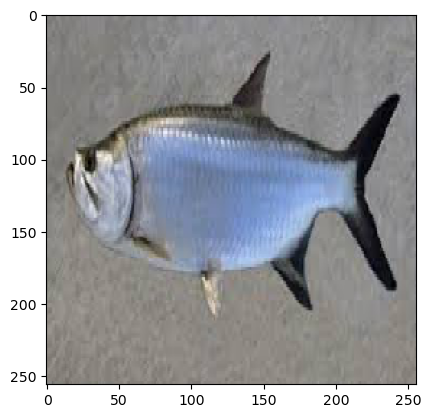

In [78]:
image_path = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRDmpCHrBhyyuXFeuCaABpmpZH65PwemU9U3Q&s"

predict_img(image_path)

1/1 [==============================] - 0s 14ms/step

Predicted Class: King_Mackeral

Confidence Score: 0.9999933242797852


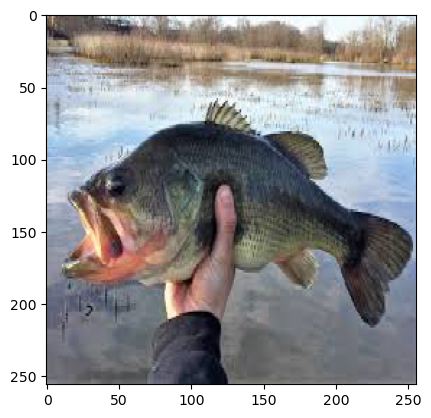

In [79]:
image_path = "data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxMTEhUTExMVFhUXGRgaGBgYGBoYGhgYHR0YGBcYGBoYHSggGBolHRgXITEhJSkrLi4uGB8zODMtNygtLisBCgoKDg0OGhAQGy0lHx8tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLf/AABEIAL0BCgMBIgACEQEDEQH/xAAcAAACAgMBAQAAAAAAAAAAAAADBQQGAQIHAAj/xABBEAABAgMFBQUGBQIFBAMAAAABAhEAAyEEEjFBUQVhcYGRBiKhsfATMkLB0eEUUmKC8QdyFSOSstIWQ1OiY3PC/8QAGQEAAwEBAQAAAAAAAAAAAAAAAAECAwQF/8QAJhEAAgIBBAMAAgIDAAAAAAAAAAECEQMSEyExBEFRImEyUmKBkf/aAAwDAQACEQMRAD8AVydopWhaAqqlDQd1IWWLCnw4ZxECu67kP9csokbU7KqUVGVMSDeHIJBFDrA7N2Std10zpKhoSRhyxjNaV7NW2wPtMKxuqaoMoE0fM0NatEzYthSt75TRnarEFsekWmy9mpJDYn1Xz6wnNINNlT2btWdKYoWsEOxocSTmDmomJSe2VoStKlG/dIpcQQUgucGq7PrnFqPZyUAa1B3a084ip2HJOITuw9PAsyDasVDt+uZMQZi5aEpxC0LxIUXF29vTh8XR5szt/KUVAqSSKBSb3ezLhQpxHyEJbZ2akqJoA7YAClNBxgcjYspCnTS9To+HhFb8aFscl6tfamUqVfRNAU4F2uHd7tRjWvPSAzdoS1pABCndy7KrofQiqrsBbukO46Vy9ZR7/D5qSyVEO4IxBfGhzoOg0id4rZ+EyRtApUyVVC8Tg4YYHHXnF1O2Vi6QpC+BZJqwFaB/COaWnZcwOQK461p9+kRBsyc/u4YlvWUEcioUsTZ2Cx9okLSSoXSA7OODD1nCab2nUzp7oBdjiU/KKP7OalgyhkaZN5QaaVkYK6HeITyhtUPLT2jnTVXUrLB64Pgz8x4xYNl7SIUxP5VEu7uBnQCrxzZd5L0IDjF82EZRaZt0hN67RwM2hxyA8do7InbMgqKfapcY1p1hTbdtAKIvhrxA0cCldHaOUmbMScCBni2T/KJkucogpc67vGG8pO2dO2f2olKQ61BJrThGJva6SHZy3jv4RzG0TQw+8ERPG/CJ3WVtIvc/tqxpKB/c1OkT7N2tkqd3To+ep3Ry612xs+PrpGDajdNWgWRg8aO0WW3y5nuLB3Z9IJPtKEe8oDiY4nYdoKSpKkqIILg4t9Yfr2ypY75JL40rF7qI2i/WnaqD3UKBfMZPDCSokVxjlU7aykqChk3OoYVi57N7ZWVSReUUGj3hnyyiozTJlCiyx4mEQ7TyFkXFgg56aP5Qttm1SVgXsy5SXDMK9CS0DmkJQZaLRaAkO8Q/xbDFySoUxYenit7XtYISUqwJoSxOGP8AGUQ/xzAEKrexx5PEvKkyli4Hk21XSVIxUAReoxdqnp4wwVb0oTeOgajvuEV2VtBCwgKFAJl564XcBxP8xD7R20/CzEBh+5TEOMboB4GGsnFhot0WK07dlkEksQQKFyMzugMvtIhhwGcUabOLVf0BGqZxYYxk87NFhQGVMtKAApEs41dIzLCubNDCUqcoUTKDa3D5kQ1mIlv7wAfjmaYDMYbt0HRIDAgXkjBg1KD4XvZnpHUsSMXMqdpkWm9eCJBxcJupyLE11iXZLdPRVUtXu/CyqgHQ54dIfy7PKcKKFOcgF0xBNfpmNYmexklLhKn/ALVDqD8oynh1ey45a9FRtO2iWcLdhiCK4Z8E1iHJ2qWYuNOeHPdFvtWzJKnvXwS7dy8kZuO65HPMawstGxbMzFS3GBEs0ajNdG8O8YvC17Rosifor0+3l3ejY7niOLeSQSCGJcc2B0qwhzaNh2SgM06Pcb1gBGlq2HZlJb2imDjAaccfrBtj1iuVtNTlVaECu6vzEMJG3a3heYPkTXlxAiNO2DINQtdC+G67U3hkIk7P2YhAYEsBiX4QnEaYRW2HAFXx904aYQWVt0gXSMMKNEGfYQXPtFDRjSlWrGiNmqcEzZhDAfDrU+7uiaKtjyzdoE3ReKcxXHRsKfeDWTbMkg3lJdOudB1GMRtl2NNwgi8Wfh0HCCy5gTS5lodN3CJaHZBte2pDguG47zAP8blEsCCokMxDEtlyiUueL3upLeDVjInB3uaYN8xAkgbZO2fNSsd5gd/rhHpkiVeDJdy1K7/rB7Lt5Ip3gN4Sf/zGV9oB+oj+1DeUUoL6S5v4KNqy0IICZS1PWiCpunOBylSmdcspYP3kkefHrFg/6jQkBpaa1a63kY3R2jlnGWjx+kVojX8idcvhWp9pswf3dDXDAkboHZ5UibQBWD9f4izq2vIOMmV6/bGqtpWVu9Il1fIHxaEoL1Iep/CrSpEgKooDJqY6QdUpGS8RThy5RYrNMsFf8iSl6nAOTnEsDZ+aZY4A/KK2v8kTu/op5sBmAgKAADkqLMH6nhCqZsmakk33S2NcefPpF+BsF+igkvkViH8ibICaTS3/ANh+Zi4Yn/ZESyr4c2ly7rFwySAQC/u+h4wWfaVKWyQ5IUejvWL+qVLUaTn/AHA/OF6tmgqJE6XzCYl4JfS1mVdFVly5jArF28HAfKAGYpIqWZ2Dxa7VsYqPvynZsE/SF9o7OKoWlFtLoPVoh4ZlrLErZmzUqUsOEAlIORGOeOPjDKRYllKSs0ADOXJGI6OYL/01MUSpSE38lXku3EHD6wwmbDmGjO36z9YTx5K4QKcPYpVLKlME4P8AfHdGU2aYwoIZJ2RPClKuOSMlNyjA2daP/GeoPi9YW3k/qytyH1Dv2W/XL7xslJDZh8APvEGbbAEFTFtzvEuwzryArUPp4GPW1I82gf4lBqoKSaghs+UTpISylXphYOQa0rVmr9hz0S7Yk7zjughmkA0J1iGv2OwiZKVpSbrhnDpfEP8ASAplEXSUJU5dQutUgKfDTPc0Gk2gu11mAbm4+RiQLUdD69DrEtMdi+12UlrstA5B2c7uMAT2fUoByx1ZJqwGgGUOTat++kFRaolwKUyvr2FQCpfO6nPjHv8AAUNgUuGLsd5fL+YsKZ4jWat4WhfA3GVWd2elpyfgRixyMEl2EJAdQYAkuwpg/ByIfCWM4N7BJxGTcnB8wOkJ4l6HuMjbP2agA0AJDM9WherYiiaKY7yS/X1SH6EgYRg3GUSWCcaszC95QOC9gsj9FLXsGY5YO2QNGyhvYtlJB7wTiDWkMLXbZEu6SokrWlCQDida5AOSd2sLJHaOxFU0zFS5cqWe4pRIMxnSpSdQSAEgOVM4dw0KEUU5yZPtFkSHuIQoMSTjm2Of2MJplivgEJZ3bu48XFIY2Hb1mKDNWfZKfuSyp5iklynuY3jeLpDswc0h0uzu2AGDEVAo4cHHfD0pi1UV6X2acOoDgwHzhdO7M6AuNdftFrm2WYFXkkFTaqarAgB2wA8YPJTMCTfKSrvbs+74NBtphuNFCPZZZO7UxhfZxYYXq7vlrF8UtN5iGpiHxdmdsY8paaM5NKBzgCchTid26DZiG7IrGz9gkHvTF7qnOgOMabQ7PqDEK11NNWfhFpSXc3S+6hYZZfqjVdgluS5BU3xYtxxpDeNMSyOymbM2Pemh7pA1S+jZxeJEqWEgEJGuA0y6RDl7LSF3gTTFjjV6tEm1LSkFwGZz3XLCmQ4dIcYaUKU7ZBtdkTUpuUGYwzHhCiRs4X1AAHGgyZvrD9O00XigqwfHUVJqKnHDSNZEyTiFHe7jNn5k+UDgmylNpFUttgvTD3KBg+6g+UCOygSaMM/MxYbXJF4d4ElTUfGpOe6Fq1BHuhy9QFEMzM144Vw5Zxk8aRoptg7NZEi/3SWU/IEfIGEVqvXyQ9RhXN6eMWywrBBYFyAetMYW7QQlzVT1OAqxukBzkW6GCUPxCM+SuzbSsfEoHiREhFqWw76/9R+sTLHY0zDicstcCK+nhpK2NeAKVOCAQdQcIyWKTNHNG84AoUKDHf5xK2UQlCQEXiAN/gKNEuYhCgRdSXyw8RHpCmSEnLWvjHqaTztYdFpIb/L9cHiZ+IcG8nrX5RFlzUvhzw+cSfajURm4lKQVKxpGqhuEDVaBA5lpb00CiwckbTJUY9gNSIizbdWjRoLWf5jRY2Z7iJ6JIGcDmS1XmGFK9X8h1gKLVwhPt3tpZrKO+q8v8iannVhCcGilO+h9Llqf3eb8YlJTuMcX2v8A1ZtKiRJSiUnIsFK5k08IqO0+19sne/aJh3AkDoIz4NFFn0sCkCpAxz5xEVbLOlN1U2U1Xdaa5VrpHy8dpzfzL6x47RWaFZ5184OA0s612121InWkShOl3UpCHSoFIKy8w3gcbt0NjiYAizomETQQqXLNyQkEMpQoVnm7bgNY5Que9SXJ6wSTaSCbtHxIoX5GMZ4r9mqlSOsDZxBIQsKtB95eSBo+XAVh/sPtEuXMMpZmWiYQlPtFKSlCSCcWolNakAqoHejcisXaKdLomYpiGKXcca57xDKR2qKgJc2qBiAm6/G6fIcolY5x6BtM79+ISFXB+nAvQv0wxjKrTjTDxNQw6RyDs72uXJUEyfw6Za1C8j3VJGBIJugltXyi5zu2ll9lftAVL7xaWxmKo4c+zdNQ+eBjoUW0YvhlsRMPxAfE+6vd8H6Ri9X3at6Ec+X/AFMsZomRPUA7E3EjAj874KPWAK/qQK3bKouxrOAdm/8AjOnjEtxXbHpk/R0hATk/81iMpN5VFLSwFOILfMRQE/1HS6CZMynvd4NhglhUOxwyh1svtvY5igDMMssB/mAJc/3AkDPFoalFicZIscqzEElyXfHQnAaYDpHvZqHJ8y1Wd4OC4cR4qMXSJtkb2jDAUpWMBRzT0yjYzi6mDsBTUs7eUDM9SZiUMSFX1FWSQGup5v4GGBpNSkH3f1cw3jEFezpSiHQe6Sc8SCCd9D6aGMucozFAhkAU1JP8HqI3DkigY48a/TxgpMdtEOz2eWgpajBhi2vDSJSmbLP7wRMkkhwCASRq7kD/ANY3EsP7ozfjRoaSE5CmbZUoIWhMsMEpFMDeuy+QKzDQKnCgRLYUHeamVGpGRLQVFOYYkbi7HwPSPBHDr9ohxRSkxKidmG64eEYNojBAyAHIfSDobMXuQPyjqckYKABVrOQaNTaicWMbzLuQY8AI2lh8B1rC1INLMomKAwYcPrBAgmpg1nF0ZA56RCtG15He794sAbpcBiS5VgnnEOfwtY/pJnIu3QwclIauBUlJOOV4QO326zyUqVMmEXS3EsD3aVx84qfaD+oElJaVdK0uEliySaFqjKjsDU5ExQbftaZaC613j5DQAU5Rm8kkaLEmWbtB22XMdEj/AC0YXn7x+nARSLUb2bnON1JLYxoiUokNwwjFycnyaxio9EabZ+MCFkIriBiRlE2Yk4Hf94PZLOSD3gHyOedd0CBsXGzp14evWMeVZE5eYzw6CG5sqSBVnoxxb9Jz4RhVhVjSpyGD/Ij5wxWKRY39a69IyLGBTh1pTz6Q1TYqGmrF+GXCM+wF13GObaUbX7QALDY3NCK10z+3jGJVmPxP6u/WGX4YNS7Q4E8PuIH7LBx0OdT8x1hiIhlM1Ty5fWJMm2TJeCiRmk1G9wYOZLCh68/+IgcyXWo+nqoikxMDMRe70ssp/cPyOB84LY7eQWVQg1d6cc4z7EEEb/XnHlSBmH3/ABDh4UglBS7GpUNkLQoO/wBd9BVuJgirJL5+I/amvMmEUkqlkEF0nj4+miy2BaJiNGqakeCco5Z4tPRqpJjfsV2im2WYiRNVekLISHc+yJ+IE4JKiHB4hqv1Ja440LOl6gkjAJRQclR0jY20hOkoVW8zKBBBvChcb8ecbYHfBjlVcjkr9UjdJiBf4RuiafX3jooxJgaBznYgYkGvzgQW+vrlGZiqQUMHPmrupwe8glsGCgSODBoGFm8+FTzBIJp+1IfjSNVzOPWAKncY0WOyHMkyXvqU3vEOdQHSBuwf9xiSEp/V1hcmdB5M/uh6lg5c45wPGha2aJI/gRvf3weXIAGAfn84HPBY08Y59R1aQEy13fy8wYgbS27JkJvLLklglI89B6rFY272hnoUkoQyWOKaE4KFdC4bGkIpdjRbFBIaWskkqBN0FnqCXYl882iJZYouOGUjG1tvTLWpTrIkoBdqJJpRsTkADufOM7Hsap8mYsmiKAKN0Es7JehU2WgOkV232GbKmFE0XSKEZU4aRKssqcZZRKUp16ZhmKSD/MZ675s02+BXbJcxKiVBID1DgkeMZlqdmGGkRrR2fmpW0xwQWIJfkDlDqz2BRASnFqU0yEW5IimgK5V7LNuojZT7xiRxzHhDFASgANg+8knE6HFnjScm8Czgtm1K0bewMQmAqMvE54nc74DlHvYqIwJG+GdglAzQk/ECmuORHPDqYkpQ1CkuCWIavHPSKlKiGIJ8tRUm8GbDdv6w5sclagU/EHIVRlAZHeNWiVarElXeutR1Hn6pBrEhSEKGShVxkGIrvrApcEP9FYtlqUFFJoBRgXiJ+LvslnPwgVJ3UjFpQVqUrvVLjLUt4+EW7+m+z0JlqnKFVKuvmEigA0cxLZ0Y4anRWEWhaVMUkPkoMeh5Q4s0xKnFDTOjYPhu8osXbexJmS7yQUmX3gdzh/B+kU7ZXvFL40c84aYskNLoIlRqN7hsIJKJNNxzrp65xhMo3sA7PTT0fCBHummRDeXn5RrwYUGEvAPlyx+rdIwU5ZgeXoRCmqrTLTLdG3403rzBqUGkGorSGWCKu4bqN/TxiXsqehEwFS1IQzFherkSCRTn1whebQCoB2r/AB8oytLFj609bodqSoXKOn7P2F7ZAmSrQhSDmkr6EGoO4sYs1h2aJSAgKUd51zZsBHD9m7Un2VRXJWUnPNJGhGfrWOkdmv6gyZ7IngSphzfuHHM+7wPWCEVHoUnfZcky4yRGpIIcYHMQNTxVioKmZq0azFPnEckx6+Bi3WLoR6dhh0iIVceY+cS1TRkQ8BUpX6esaRkZyiDS+cHBECY5pA4GNwBGmojSAE81cnmomI02aXoT1iIlDZmPK/ubnHIdVhZ8oLSoFmX7wpUswUPyrGoxZi4ivWjYpsU9JBvyl1SoUO8HQw99u1KHfU+cNLJZRa5KpR95IcHNJyUN2R4COLyotfnH/Z1+NNXTKd2oswUEruBaQA4ILsXzy90h3zG+B9ntjSJqr0meQRW4pnHkecWK07LV7LvjvJJQoZVqCN1ARxaKDNKpE2+g3SkuD9d2UciknwjtcNJZbbsNYWXYnfnm4PPzjSVISO4UpS+Cg3vaE8IstjmptllE1BAWnEflUMUncQacYTApKmXRxpgflDV/SJ401aFdo2MpRxqG8wQDyctvhVPsakXaFiaZk0Duwyp1eHUi33VFF524+YMEmWpJKWCWD1AFAzfIdd0dMZUcehleFjKWyZmJBGpHlEyYoEhYzDkb6iu8EGJXtQpSmA7pTqwA3Z5+EL1z+8ADeJKjg3vEmLbtEyg0GJZioi6KgfmbPju3wbaq7snHvLBpkATU843t6CAKAgYUD+HWK7t+2lrrknPQJyA5wo3JmemhbaUmo0JdulT6yi19gpwMgJfUdCY5/abQog1p6MWL+nM494PQKPkIqS4OjBKpFy2nZ7yVpcl0qHUNFI2dMIWQSxAINBiK8/dizbUtZBNWHEU8IpWzrSVzCe8CSSG4lTHp4xK5RXkVaLCVivfFD4bq6KHSI86XeNAH/T8+YMS5cgiWouQWfvJrRlHDV2/bBEoKgCQFHAgUOYPkqFqo5xXaZTn9TaMd5iJPsfKrHjjDado5G5WGJLOMvtESdQuXAcYVScsMhDUmAnVZyfMeXzjyVqArw9Zw3VJcigPNs8hl7vhGTZkqDNXvblP5EfaK10ITrtRzy9euEahaSaU0ifaNn3nLF8mbSjiFU2yKA36fbLERopiotHZ/tbabIAkKvS/yKqnlmnlFnmf1Ol0v2deA9xQxzDFvOOVe3UmnJjB5M1x3g2/fGimS4nUJf9QrEv8A86P7kA/7FKhnYe0FkmNdtEtzgFKuHotiY4yJiXbOGMtRUG9eBit5oNpM7kJLihBER1y443YbZOkqHsZq5e5KiBzSaHm8WbZvbm0oLT0pmp1ACFtrTungw4w450TLE0XsjfBUmIOzNrSbSm9LU+owUOIx54QxDaR0KRi0JXJOfjGa6eH1jKVb4xNtJSHZStyUuftHJZ00bFVMQIY7HtKQ5ScaFXyG7zip23ZttnK7qAmUMVLUEiuaicNGwhjZLaJEkBIC1bzjvp9Y4s7c/wAekd/jKEfyfLL5b0e0s6lpFWD/ALSD5PHLO0KEkFsflpFq2T2xYlE9BCFBlU90YBgMR9YRbRsBmTAEiiqpOTYvTKOKCUZ89HoYo3Fr/hWeym2lWa0gBShLmdxQP/qSNQfBRi/bQsSJiCXriCOsViydlXmCZMUGSoEAHEgv0eH60ge6Tw9YR0yywXRnHDKqb5IBsktLk+81dX4cvGIMyznHAaV8YYCUHxPHGGibLLoXC/LpGe58JeFQ77KzZ7M5YVd3bSGBsSEp7oF5vKJ1smISGF0DdCe0zVqLSgc+9/xEaxdnHl5YK02ioQHJzb/aPmYTdoLGSzADB1ZZ4xYbNYboZhu1Ovj5QDaljSl1zDhlv0DY5RalTOerZzS1SyASxZ2EXrsPssokucTUxHk7H9soLIupBcDQangWMW0NKQEt9Dw+kW5cG0Y6WVztASUrSMSGHOkbdmtgXe9MQTQsEsWNS/HugfujO0Zgd9TDfZs8AA08s3+sZtv0Rl7JdqsaU/ERebukOD3i2GF5SxyGUK1ySX90szM4qwD/AO884cWi0Cl0s3OjEB+bHlCy0LDM44YejWJVmQrnyBX3hxS40xgErZ7/AJeRauOET7TIKKkFIOr1iGu3pdhU8/tA2zRY21ZiZZAK0HjvEYl2ZxTBiMHFd8S7Oi8O8RwEPdn2oSwEliGzoNzNgN4wzEC/YOKSKl+GSCzjgaPA7VYqVANaOXq2uOOv0i92gjBQdJqygDTgaRBn7KkmqO4r9JLf6TRuDR0bMquLsx1r2c82hYaOz941NFNxwIbX+EE4FJIIwOHrlF42ypUsGgBSWJehyHEEN4RSrVOcktjTL1zhwbfZTVAbMSpfGLLZ5NK041bcQapPOF+xbI/ecA78/pDs1DZ5HPrBIpA0UarB/wC5J5nDrAp0vG8LtcRhBEAggUBOuB+lY9McE3aHNJ+TZcIgGZ2Xa1yJyFpahFU/EnMEbxHaAiOS9lLAZk9K7v8AlpLrB6s2vCOoi3ojsw6qMMlWI1TGhftG1zksZZa6XFcDmWzcMG3QOZbFKfLhGksuanrEOOpcl2R7dtSfPrMK1KwAKCkAfpFAOQiPLVNeqQD+qkTpfdSylhSiTXAVJI825QOZaQGzY8v4rHO/GT6NoZq7QVAWr3rh4E/eJkhFz3Td1YtTnCUW00AJLjFhi+GEZSgqXdDAhIUXbMqGH7Yyfiyfs64eZCPobqtqU5vzJgYtylFgKby0RVWHVWG7cD0j0qxI3nnz+kVHxY+yZ+fJ/wAUNBNbh+kOY0/CqNUhTaqAEBs7yi6FKG53HNJpBZ+0Ji6Pd/tH1itmnwczzuXbCI2cSQVGmmL68IlrRKGTNQNTrBuwFnUu2C8sqSlC1FJwPwhxnVT8oF/USyJEwhIuk5JpzYZ/SMMicZUb4YLKRLXtOTKSSVJSNSRv1hLY5ZtZ9uon2dRLG7NXOEE/YAmKALk1JONBlHQ9i2cIkoSkAJSkADT1XpA3RrDFV2ZlWdKQGZ/TgxGtiQBu8t0GtsysK7XaHpGyqjGd2JdpSr5ujEsBxNIfzNiyx7ilo3A3h0NfGIOzbPem3skV55fMw7XNYRcUYZHyLxscn/vK/wBLfOCWawJllySpWp+UFTb0u1Y3UtJwNYpJIyZIQpKhdNQcQYQbS2CxKkVHiPrxhkSxoY3TatRBKKkOMnEqSbQU91VCMDru4w0szranTzifa7FImPfQX1SWjbZthEoODeI90ml0Z4Ynw1eMttluaJa1FkgqJYcuXhGEkCB3hBpUrN6R1RdKjFq2VztxYr8pMxNQKKG4+6eANP3RRPwbVZ9PXrGOs26QFoUg4KSQWxrnxjm9rSqUtSFe8ksd4yUOIY8oif1GuP4zWQggOmhDc9D8olBQJoWOYOun3iNImvxrTzAjZacFPQ0f5RCY5DJEwFLKDpx3g68oPK2bMmkXU0GEzAeUTdjSlFSJlwEYKNG0fjnFk9plGsYJ8mUpUYslnRKQEoHE6nUxISukRSuDpVQR0KVKjJoroXxjyTi5oxPQE/KNSfOMzFEgowUUFsqV0IIqTGTZskDTRTs4eNJamlJWEKUwDgFIyqXWQOTw2URlEZdnv0WHS+DkA/3AUUNxiXIKIaEghKkFTKAIoxbQjLhGFlYUVEmqUjoVf8obBZzj0wXsoNX0TQvl7S7ywb1CAMMLqNecEs1rJUtknLy57usHlyEpKjQElw/BI8wYIhQ/iEAQF8Y0Wp48ua2EaBT6QhFi7CWq5bEA/GlSfC8PFIh72u2XeWVtwPyjn8rbCZExC/eUhSVXRuILE5feCbe/qTa5oKUBElJyAvq5qWGP+kRy5McpStHX4+Xb5Yx2fs9lqJxHlpDGfaZSP+4gDNJUAQeuEcnt05c1/arWp/zKUx5O0Ip9lQ9EtF7F9mkvK9JHYLVMCqoUFc3I6YwrKDUnCOUkmWp0KUk6gt5Rb+ynaJc1QkTjeJqFZlqkHUs9Yp46Mt2+y8WBN1A1NTz+zR6evI+EZVaKU8oBNndYaMXyCQgFTMfW6JRs43iBy7WcwOIgxtCTgesOxJERTb42EYUI1EMQakZrkYFGCTDAPf1EGlzE5GIiF6GNSXMAEmfNYxW+1ezvaJE5I7yQyt6MX33S54Ew5WY3lqiuGhdM5zKejZeh1idMutqk1I9YQ12z2dUD7Szsxxlu3+k6bsvCF9hkTVTAkIO+hDa3tDEaS9Vlj7Hq/wAuYHdlBjqGx8PCHikREslkEtITLYa7zBCs5xquDN8hrmbwVIoIgqnnKJCJ5YUEVYUQSkaCNUyxfdvhbXONEqgiZw1jMs1VOrBkqiNMAxEbSJogbESGjCxGwXAJs8ijNE2DIs13rHkUggWSY3Ep8obYqAe1MYmrLbz6MF9hxgVqVdSFZh25hjxiRpC6fgXYDk5+0RCgqdhTWJiZT95Z4D6xrNB/mkUkUL7TZ6YgQumpSkuok6ADzeG82WTnwGULrXZE/n8PvDoQjtdoCjQUhl2QkPaUq/KFHwb5wttEmpY3vCGnY1d21BJwUlQ8H+UDA6HKmUwIiPa1gcYMmamtT4xCtawTwjIYILMGQo6wEJgsswCDJmqGMFTOMDxjAlmHYUSUrePKUcojoCxBkK3QWBtxEak5PGVq0+cYSBnFITNY3SYG4jIMMDcuI8madYEQqMg6iHYiUmcYyuY8BBj0AzJMSE4RGColJwEVYUL840nIhirZ4/MYEqx74zGLyIGpQET59lyeAf4eD8R6QrGaItQGfhG67UjjGZ+zUirmIsyyb4QBlrTi7R5NqH5h5QI2INiY0FiGsAg821jOu8R5c9CkOp2GAZ7x03cYF+DGsTF2MBCQ+QhxVsGLlr+Iht1abniKoPV4aKsgGZzhZtAMW3HwjQBXaZ1SAYXzlldBjG6pdXNY0lTSCwyhk2LrUkppBtj7Q9jMStnApvY4tvj1sD97OISRWEwR0uXNvAFNUliOEas8Q+xKL9mqfdUoDhQ/OH/+GjG8YxfDLFhVGySIYnZo18I2Rs0a+EKwIss6QT2hiSbHle8IwixfqMFgRkr3QQVg5sX6vCPIsn6jDAiEZRiucTVWT9XhGPwf6j0hpiogxsDEkWT9UZFi3+EOwoje1jYK3xI/BjWNzYB+Y9IYEEqrBUiJQsI18I2/AfqMAEMvEhBoIMmxP8XhBBZd/hDsD//Z"
predict_img(image_path)

1/1 [==============================] - 0s 14ms/step

Predicted Class: Trout

Confidence Score: 0.9999997615814209


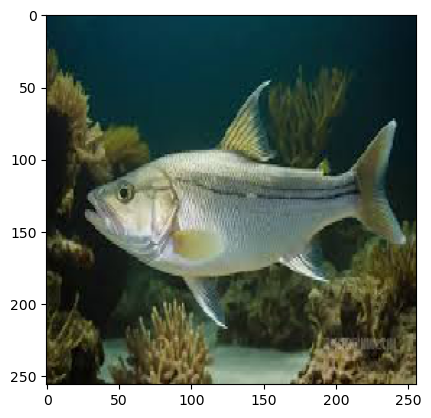

In [80]:
image_path = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQe-bjRQDwn9xYtygxV7GmSJc8fxnoT7cb48g&s"
predict_img(image_path)

1/1 [==============================] - 0s 13ms/step

Predicted Class: Snook

Confidence Score: 0.8627323508262634


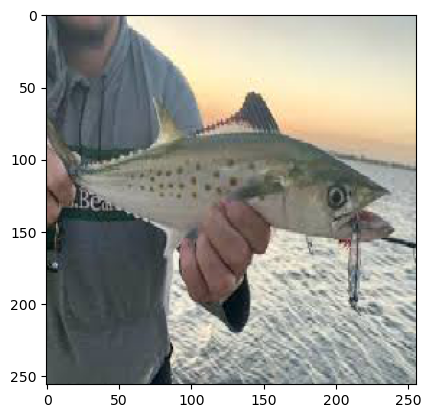

In [81]:
image_path = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRSUB9wB90YI-H8v35S1mhfC3dIo22LoJivow&s"
predict_img(image_path)

In [82]:
model.save("models/CNN_fish_model_final_2.h5")